In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

**1. Load Data**

In [3]:
# Load the data as pandas dataframe
df = pd.read_csv('../dataset/cars.csv')

In [4]:
# Check the first five rows in the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the number of rows in the data
df.shape

(8128, 13)

In [6]:
# Show the non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# List out the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

As the name of columns are perfect to be used, no updates are applied to make them more readable and accessible.

**2 Explatory Data Analysis**

2.1 Cleaning the data

First all the unnecessary feature data are to be removed such as units and brand related information.

In [8]:
# Here we define a function to return float values for features with pattern "floatvalue + unit"
# Example for feature km_driven, if data is "12345 km", then 12345.00 is returned

def getFloatValues(featureValues):
    # all values are converted to string in case there are any float or integer values
    featureValues = featureValues.astype(str)

    # the first part of values are separated and converted to float values and mapped
    # in case the values can not be converted to float, then values are set to 0
    for index, x in enumerate(featureValues):
        try:
            featureValues[index] = float(x.split(' ')[0])
        except ValueError:
            featureValues[index] = 0

    return featureValues

In [9]:
# For feature name, the brand name of the car is kept. The first word in the name is assumed to be brand name
df['name'] = df['name'].map(lambda x : x.split(' ')[0])

# For feature mileage, the unit kmpl is removed and values converted into float values
df['mileage'] = getFloatValues(df['mileage'])
df['mileage'] = df['mileage'].astype('float')

# For feature engine, the unit CC is removed and values converted into float values
df['engine'] = getFloatValues(df['engine'])
df['engine'] = df['engine'].astype('float')

# For feature max_power, the unit bhp is removed and values converted into float values
df['max_power'] = getFloatValues(df['max_power'])
df['max_power'] = df['max_power'].astype('float')

# For feature torque, it is dropped due insignifcance to car company
df = df.drop('torque', axis = 1)

# For feature fuel, all the rows with values LPG and CNG are removed
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
df.shape

(8033, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.9+ KB


2.2 Univariate analysis

Countplot

Count plot can be used to see the number of rows for a label for a categorical feature

<Axes: xlabel='seller_type', ylabel='count'>

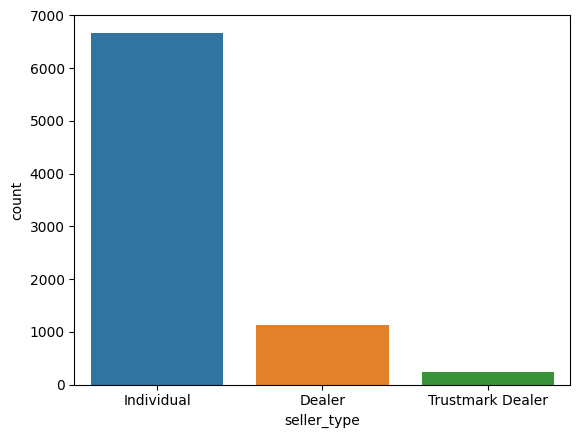

In [12]:
# Let's see how many individual and dealer sellers are there
sns.countplot(data = df, x = 'seller_type')

Distribution plot

Distribution plot can plot the distribution of continous values. It helps in identifying the type of distribution for the feature

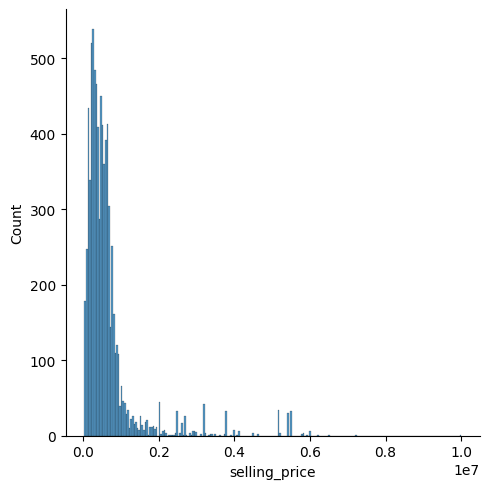

In [13]:
# Distribution plot for selling prices
sns.displot(data = df, x = 'selling_price')

2.2 Multivariate Analysis

Multiple variable exploratory analysis

Boxplot

Text(0.5, 0, 'Owner')

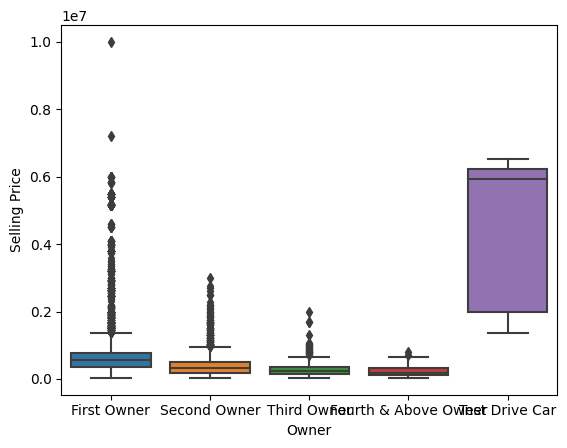

In [14]:
# Box plot for 'owner' and 'selling_price'
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

Scatterplot

<Axes: xlabel='mileage', ylabel='selling_price'>

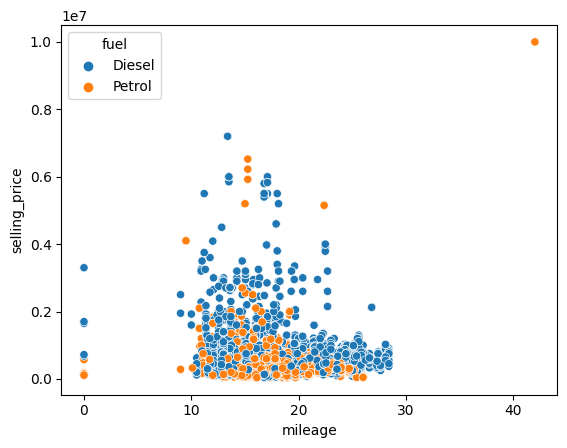

In [15]:
# Scatter plot for mileage and selling price with respect to fuel type

sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue =df['fuel'])

Corelation Matrix

<Axes: >

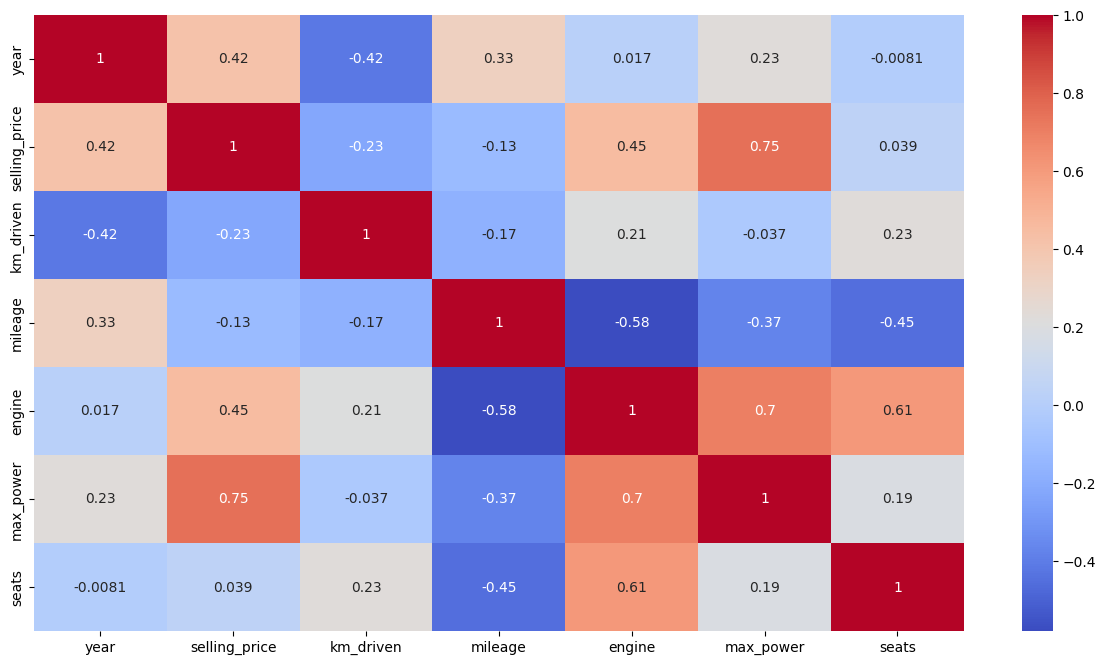

In [16]:
# Let's check out heatmap

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Currently, feature max_power and engine have shown strong correlation to selling price. However, the above graph does not include categorical features.

Label Encoding

Lets encode the labels for the present categorical featues

In [17]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

All the categorical features except 'owner' are label encoded through LabelEncoder class

In [18]:
# Loading the features into list
categorical_features = ['name', 'seller_type', 'fuel', 'transmission']

# Each feature in the list are label encoded 
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    le.transform(le.classes_)

As the feature 'owner' has the requirement to assign custom encoding to each label, each label has mapped to the required encoding value.

In [19]:
mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(lambda x : mapping[x])

# Removing the rows with Test Drive Car value
df = df[~df['owner'].isin([5])]

Now that all the categorical labels have been encoded into integer values, lets look into our current data

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


Now the correlation matrix will display the values for these converted features as well

<Axes: >

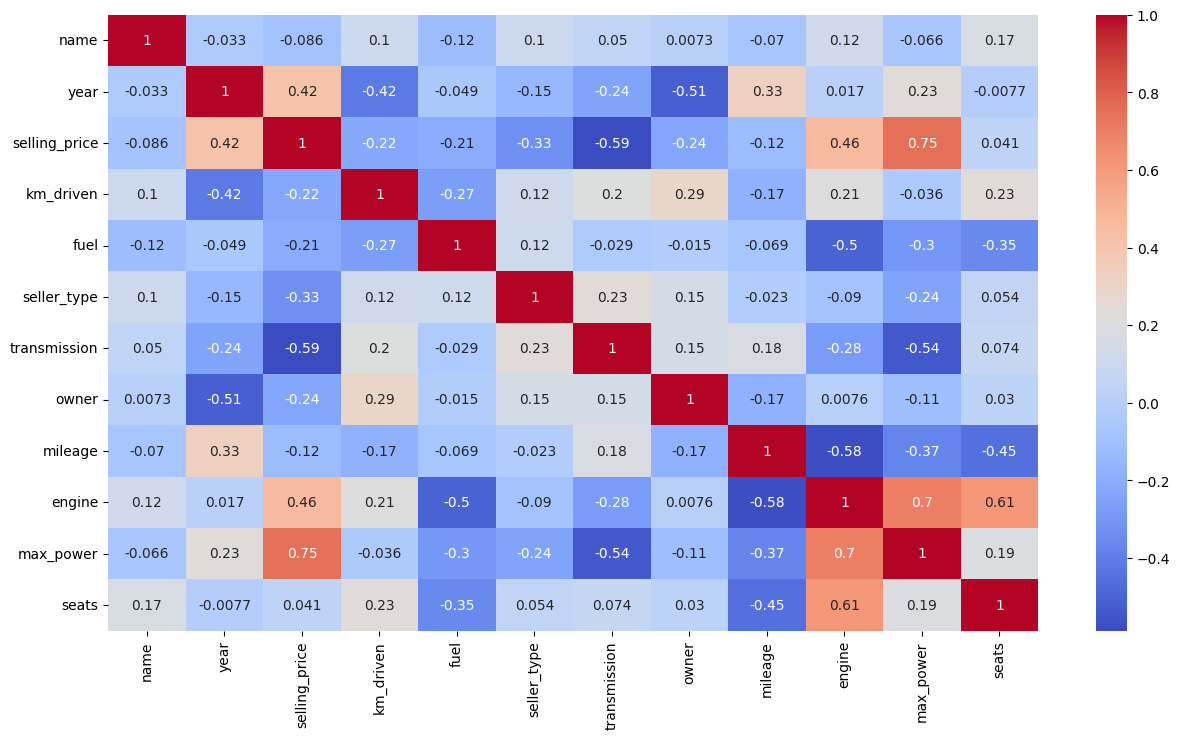

In [21]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

The most correlated features are still found to be engine and max_power

**Predictive Power Socre**

Let's check the predictive power scores of features. This graph plots the direct predictive power of a feature against another feature.

<Axes: xlabel='x', ylabel='y'>

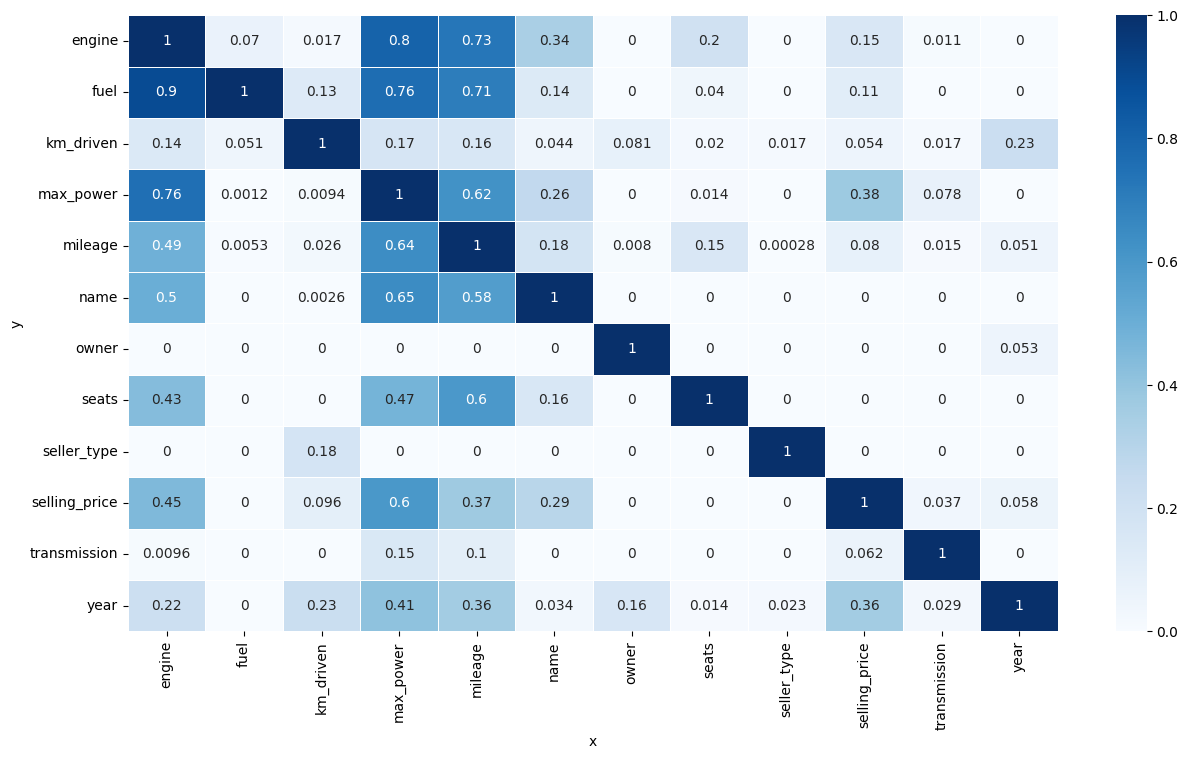

In [22]:
import ppscore as pps

dfcopy = df.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

**3. Feature Selection**

In [23]:
# According the corelation matrix and pps scores, the most strong features are max_power, engine and mileage
# Therefore, X is set to those features

X = df[['max_power', 'engine', 'mileage']]

# y is the selling price. As selling price values are too big, they will transformed with log
y = np.log(df['selling_price'])

In [24]:
print(y)

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64


**4. Test Train Split**

The training and test data are split into 7:3 ratio

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**5 Preprocessing**

5.1 Checking for null values

Here all the null values for the features are filled with appropriate values

In [26]:
# Checking for null values in X for training set
X_train[['max_power', 'engine', 'mileage']].isna().sum()

max_power    149
engine       154
mileage      154
dtype: int64

In [27]:
# Checking for null values in X for test set
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    59
engine       60
mileage      60
dtype: int64

In [28]:
#Checking for null values in y
y_train.isna().sum()
y_test.isna().sum()

0

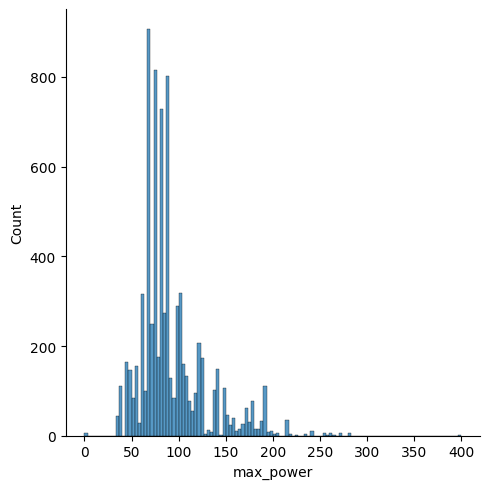

In [29]:
# Distribution plot for max_power
sns.displot(data=df, x = 'max_power')

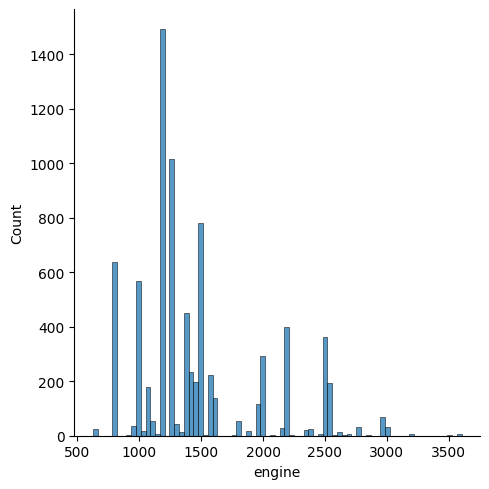

In [30]:
# Distribution plot for mileage
sns.displot(data=df, x = 'engine')

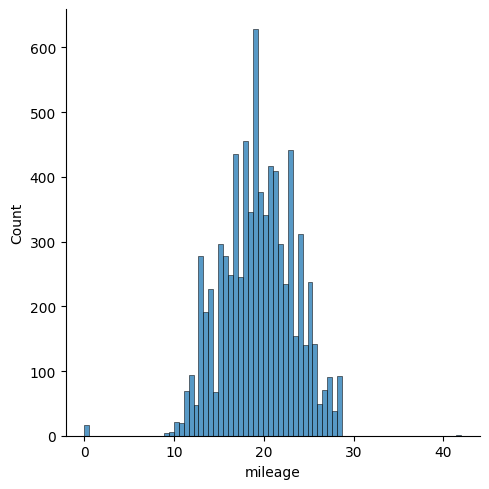

In [31]:
# Distribution plot for mileage
sns.displot(data=df, x = 'mileage')

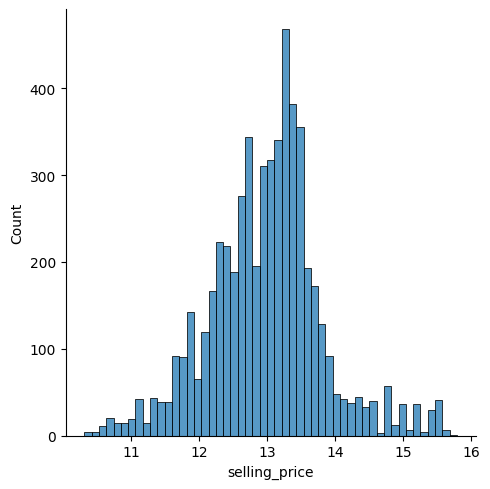

In [32]:
# Distribution plot selling price for training
sns.displot(y_train)

In [33]:
# The null values for features max power and engine are filled with median values
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

# The null values for feature mileage are filled with mean values as mileage values resemnle normal distribution
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace= True)

In [34]:
# The same process above is repeated for test data as well
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace= True)

In [35]:
# Final check for null values for X in training and test sets
X_train[['max_power', 'engine', 'mileage']].isna().sum()
X_test[['max_power', 'engine', 'mileage']].isna().sum()

max_power    0
engine       0
mileage      0
dtype: int64

As the values for y have no null values, the y_train and y_test are not updated in this process.

**5.2 Checking Outliers**

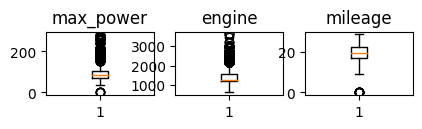

In [36]:
# Create a dictionary of columns

col_dict = {'max_power': 1, 'engine': 2, 'mileage': 3}

# Box plots to detect outliers in each variables

for variable, i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(X_train[variable])
  plt.title(variable)

plt.show()

In [37]:
# This method takes feature name and training set as parameters and print the number and percentage of outliers present for the feature
def outlier_count(col, data = X_train):

    # calculate your 25% quatile and 75% quartile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quartile
    iqr = q75 - q25

    # Calculating max_value and min_value for the feature
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # The number of outliers is counted on basis if the value is greater than max value or less than the min value
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [38]:
# Method call for finding out outliers in all features in training set
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


From above, feature engine has the highest number of outliers at 14.88%. While the percentage is high and may affect the training model but it has shown good scores in corelation matrix and pps score graph. Usually, the values of engine do tend to affect the prices in real world as well. Hence, engine will be used to train the model.

To mitigate the effects of outliers, all the training set will be scaled by Standard Scaler to covert the data into more consistent form.

**5.3 Scaling**

For scaling the features of training and test set, Robust Scaler will be used. The process of scaling generally helps in faster convergence while training data.

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [40]:
# Shape check for X_train, X_test, y_train, y_test before model fitting
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


We will also add the intercept in X_train and X_test such that bias won't be dependent on any features

In [41]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

**6. Modeling**

Here, we define Regression class following methods to train, fit and predict a model. Regression class be instantized for Linear Regression models and as always as Polynomial Regression models

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import mlflow


class Regression(object):
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, name, lr, method, theta_type, momentum, num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.theta_type = theta_type
        self.momentum = momentum
        self.cv         = cv
        self.regularization = regularization
        self.name = name

    def mse(self, ytrue, ypred):
        return mean_squared_error(ytrue, ypred)
    
    def r2(self, ytrue, ypred):
        return r2_score(ytrue, ypred)
    
    # Get Xavier theta values
    def getXavierTheta(self, num):
        lower, upper = -(1.0 / math.sqrt(num)), (1.0 / math.sqrt(num))

        numbers = np.random.rand(num)

        scaled = lower + numbers * (upper - lower)

        return scaled
    
    def fit(self, X_train, y_train):
        # Create a list of kfold scores
        self.kfold_scores = list()
        
        # Reset val loss
        self.val_loss_old = np.infty

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):           
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # Assigning theta values based on provided theta_type
            self.theta = self.getXavierTheta(X_cross_train.shape[1]) if self.theta_type == 'xavier' else np.zeros(X_cross_train.shape[1])
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                # Log parameters for each fold in mlflow
                params = {
                    "Regularization": type(self).__name__,
                    "Method": self.method,
                    "Theta": self.theta,
                    "Learning Rate": self.lr,
                    "Momentum": self.momentum
                }

                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    # Seprate the 
                    if self.method == 'stochastic':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini-batch':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = Regression.predict(self, X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    # Record dataset in mlflow
                    mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    mlflow.log_input(mlflow_train_data, context="training")
                    
                    mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
  
            
                    
    def _train(self, X, y):
        yhat = Regression.predict(self, X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)

        if not hasattr(self, 'prev_step'):
            self.prev_step = np.zeros_like(self.theta)

        self.prev_step = self.momentum * self.prev_step + self.lr * grad
        self.theta = self.theta - self.prev_step
        
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta
    
    def _coef(self):
        return self.theta[1:]  

    def _bias(self):
        return self.theta[0]

Now we can create `Ridge`, `Lasso` and `Elastic` class that extends the `Regression`, with added penalty.

In [43]:
from sklearn.preprocessing import PolynomialFeatures

class LassoPenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta): 
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)

class PolynomialPenalty:
    def __init__(self, degree):
        self.degree = degree

    # No penalty for Polynomial
    def __call__(self, theta):
        return 0.0

    def derivation(self, theta):
        return np.zeros_like(theta)

class Lasso(Regression):
    
    def __init__(self, reg, method, lr, theta, momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization,  reg, lr, method, theta, momentum)

class Ridge(Regression):
    
    def __init__(self, reg, method, lr, theta, momentum, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, reg, lr, method, theta, momentum)
        
class ElasticNet(Regression):
    
    def __init__(self, reg, method, lr, l, theta, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, reg, lr, method, theta, momentum)


We will also define the class for Polynomial Regression which will implement the Regression class

In [44]:
class Polynomial(Regression):
    def __init__(self, reg, method, lr, theta, momentum, l, degree = 2):
        self.regularization = PolynomialPenalty(degree)
        self.poly = PolynomialFeatures(degree = degree)
        super().__init__(self.regularization, reg, lr, method, theta, momentum)

    def fit(self, X_train, y_train):
        X_train_poly = self.poly.fit_transform(X_train)
        # Call the fit method of the parent class
        super().fit(X_train_poly, y_train)

    def predict(self, X_test):
        return super().predict(self.poly.fit_transform(X_test))
    
    def plot_feature_coefficients(self, X_train):
        return super().plot_feature_coefficients(self.poly.fit_transform(X_train))

7. **Experiment and Testing**

In [45]:
# Helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

Here, we have listed all the regularization method which include Polynomial as well, methods, theta types, learning rates and momentum. All the possible combinations with these parameters are stores as parameters below.

In [46]:
import itertools

# List of all the parameters
regs = ["Lasso", "Ridge", "ElasticNet", "Polynomial"]
methods = ["batch", "stochastic", "mini-batch"]
thetas = ['zero', 'xavier']
learning_rates = [0.01, 0.001, 0.0001]
momentums = [0, 1]

# Combining all the parameters into list of arrays
all_combinations = list(itertools.product(regs, momentums, methods, thetas, learning_rates))

# Init parameters
parameters = []

# Fill the parameters list with combination dictionaries
for combo in all_combinations:
    parameters.append({
        "reg": combo[0],
        "method": combo[2],
        "theta": combo[3],
        "lr": combo[4],
        "momentum": combo[1],
        "l": 0.1
    })

No, we loop through each parameter combination to instantize a model and train the model using our train set and test using the test set. An iteration of a parameter combination is logged as an experiment through mlflow.

Each experiment will have name and log its MSE and R2 score based on test set after training.

In [47]:
for params in parameters:
    # Define run name based on parameter values
    run_name=f"reg-{params['reg']}-method-{params['method']}-theta-{params['theta']}-lr-{params['lr']}-momentum-{params['momentum']}"
    
    print(run_name)
    
    # Start mlflow experiment
    mlflow.start_run(run_name = run_name, nested=True)

    # Get regression class based on regularization method
    type_of_regression = str_to_class(params['reg'])
    
    # Instantize an regression object based on regularization. 
    model = type_of_regression(**params)  
    
    # Start training the model with training set
    model.fit(X_train, y_train.values)

    # Get the predictions for test set
    yhat = model.predict(X_test)

    # Record the mse and r2 score from predicted y and y_test 
    mse  = model.mse(y_test, yhat)
    r2 = model.r2(y_test, yhat)

    print("Total MSE: ", mse)
    print("Total r2: ", r2)

    # Log the mse and r2 score in mlflow
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="r2", value=r2)

    # Log the trained model in mlflow
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # End the experiment for given parameter combination
    mlflow.end_run()
    print("========================================")

reg-Lasso-method-batch-theta-zero-lr-0.01-momentum-0
Fold 0: 0.47383689247523647
Fold 1: 0.45721699841010727
Fold 2: 0.48297740857390514
Total MSE:  0.48591198674688996
Total r2:  0.3093787992172533
reg-Lasso-method-batch-theta-zero-lr-0.001-momentum-0
Fold 0: 55.26798896452252
Fold 1: 55.25375347448539
Fold 2: 55.99506922867249
Total MSE:  55.83770486312855
Total r2:  -78.3614972120736
reg-Lasso-method-batch-theta-zero-lr-0.0001-momentum-0
Fold 0: 147.60921958601216
Fold 1: 147.03668215907652
Fold 2: 147.29339185193024
Total MSE:  147.01928007970668
Total r2:  -207.95683686797184
reg-Lasso-method-batch-theta-xavier-lr-0.01-momentum-0
Fold 0: 0.44343219321361005
Fold 1: 0.4415994599383327
Fold 2: 0.45929635010658765
Total MSE:  0.4623632076253087
Total r2:  0.34284841214611816
reg-Lasso-method-batch-theta-xavier-lr-0.001-momentum-0
Fold 0: 59.30515807423722
Fold 1: 52.588142807970314
Fold 2: 58.636531125431695
Total MSE:  58.42595281862268
Total r2:  -82.04014470318386
reg-Lasso-method

ValueError: Input contains infinity or a value too large for dtype('float64').

From the above experiments, it is found that Polynomial regression consistently has produced the lowest mse scores in test set. The best set of parameters are found to be:

Regression: Polynomial Regression

Method: Mini-Batch

Theta: Xavier

Learning Rate: 0.001

Momentum: 0

For Linear Regression, the best set of parameters are found to be:

Regularization: Lasso

Method: Mini-Batch

Theta: Zero

Learning Rate: 0.0001

Momentum: 0

The mean squared error from the test set is similar to best mse from the training set. Hence, the model has been successfully trained. 

**8. Feature Analysis**

The main point of feature analysis is to distinguish the most important and relevant features in the model. Each feature may provide different level of significance in the model. Here we will look into best performing linear regresssion models to anaylyze the best feature importances.

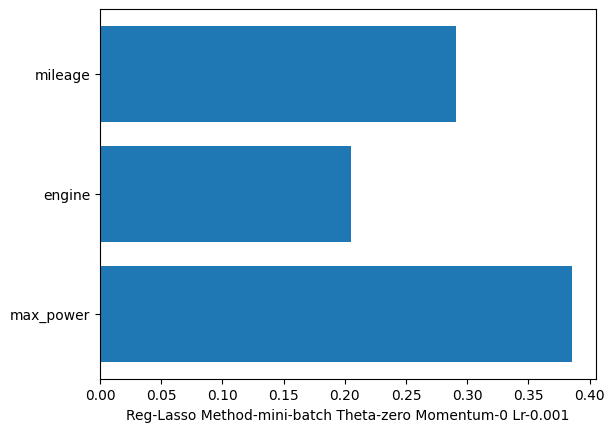

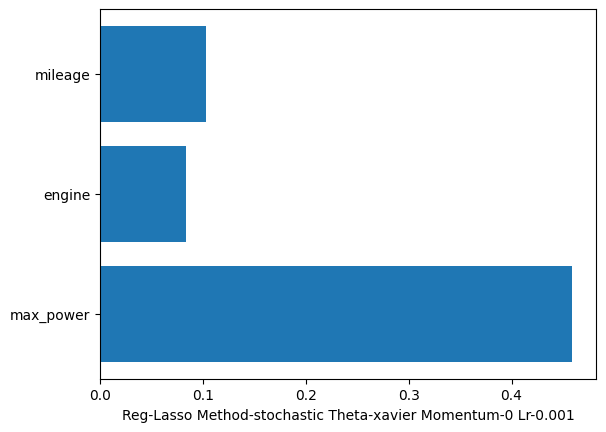

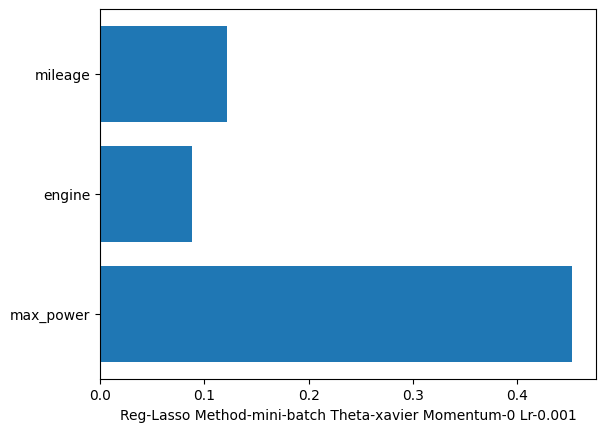

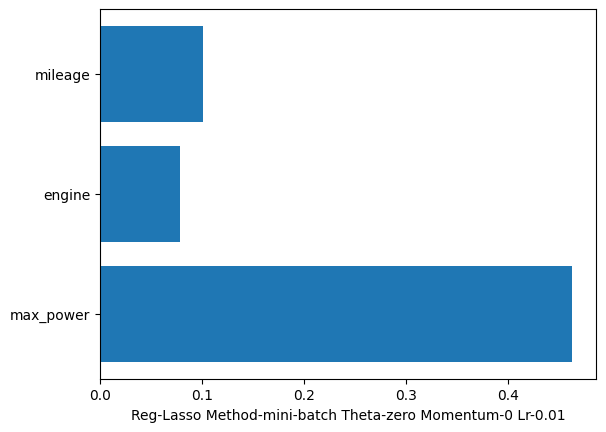

In [58]:
# Method to plot the feature coefficients of a model
def plotModelCoef(model):
    plt.barh(X.columns, model._coef())
    plt.xlabel(f"Reg-{model.name} Method-{model.method} Theta-{model.theta_type} Momentum-{model.momentum} Lr-{model.lr}")
    plt.show()

# Load the best performing linear regression models
best_models = [
    mlflow.sklearn.load_model('runs:/7cfdc87db4394b42aba2726b0da7e7e4/model'),
    mlflow.sklearn.load_model('runs:/50fe38de054d4114aefaa10956b8bed5/model'),
    mlflow.sklearn.load_model('runs:/522f97da6ecf4cf183313672bd1fb1ca/model'),
    mlflow.sklearn.load_model('runs:/1bf59b3050b44ffc8b39cae3d9c57ed3/model'),
]

# Plot the graphs for thest models
for model in best_models:
    plotModelCoef(model)

Hence, we can see that in each best performing models, the weight of feature 'max_power' is significant relative to other features 'mileage' and 'engine'. We can conclude that the most important feature is found to max_power.

**9. Inference**

As our model has been trained to fit our needs, the model will exported to model file using the pickle library. The model will be accesible to the app to be imported and predict the selling price based on user inputs.

First we will use the best performing polynomial regression model.

In [59]:
sample = {
    "max_power": [100],
    "engine": [1200],
    "mileage": [23]
}

# Convert the sample to panda dataframe
sample = pd.DataFrame(sample)

# Scale the sample using the same scaler used for X_train and X_set
scaled_sample = scaler.transform(sample)

# defining the intercept for the sample
intercept = np.ones((sample.shape[0], 1))

# adding intercept to the sample for bias
scaled_sample = np.concatenate((intercept, scaled_sample), axis=1)

In [61]:
# Loading the best performing polynomial model
poly_model = mlflow.pyfunc.load_model('runs:/d71717964fcd4acdb84ed1cb9e3b5288/model')

# Using the model to predict the selling price
predictions = poly_model.predict(scaled_sample)

# Expoentially transforming the predictions
predicted_selling_price = np.exp(predictions)

print("The predicted selling price is " + str(predicted_selling_price[0]))

The predicted selling price is 676764.8195126374


Now, we will do the same for the best performing linear regression model

In [63]:
# Loading the best performing linear regression model
linear_model = mlflow.pyfunc.load_model('runs:/7cfdc87db4394b42aba2726b0da7e7e4/model')

# Using the model to predict the selling price
predictions = linear_model.predict(scaled_sample)

# Expoentially transforming the predictions
predicted_selling_price = np.exp(predictions)

print("The predicted selling price is " + str(predicted_selling_price[0]))

The predicted selling price is 448573.7357034784


Let's store the best performing linear regression model to pkl format for further use

In [64]:
import pickle

# Save the model as a .pkl file
with open("../model/v2-model.pkl", "wb") as f:
    pickle.dump(linear_model, f)

**10. Report**

10.1. Summary

The above implemenation has resulted in creating a model to meet the requirements of the car company. The prediction result from the model have been found to be good. Both linear regression and polynomial regression models were used with all possible parameter combinations. Polynomial regression models were consistently found to be produce the best mse and r2 score from the training set. For linear regression, Lasso regularization produces the best results.


10.2. Features Discussion

There were 12 features to be considered for training our model. The feature torque was dropped earlier on due to insigifance and lack of knowledge to the car company. The categorical features were label encoded and the float values were extracted for the other coninous features to be plotted in the correlation matrix and PPS score graph.

The correlation matrix showed strong values for year, engine and max_power. The PPS score graph showed strong values for engine, mileage and max_power. The features for training were selected the based on PPS score graph, and the general knowledge that these feature do signifacntly affect the prices of car in the real world.

In the feature analysis section, the feature max_power has been shown to have significant importance while predicting the result. The feature engine and mileage have comparably equal importance in prediction. Hence, these features have been appropriate for training the model.


12.3. Preprocessing Discussion

The feature engine had significantly more outliers than the other two features. A high number of outliers may affect the training and prediction result of the model. However, the feature was deemed important in order to be dropped. The scaling process was relied upon to mitigate the effects of any outliers on the training. The following three scalers were considered:

- Standard Scaler
- Min Max Scaler
- Robust Scaler

From the above list, Min Max Scaler was found to be too sensitive to outliers. Standard Scaler could perform well but it was too sensitive to extreme outliers. Hence, Robust Scaler was used which was found to be less sensitive to extreme outliers.


10.4 Experiment Disussion

The total number of experiments is 144 based on all possible parameter combinations. Here are the best performing parameters for each regularization method.

| Regularization | Method | Theta | Momentum | Learning Rate | MSE | R2 |
|-|-|-|-|-|-|-|
|Polynomial|Mini-Batch|Xavier|0|0.001|0.265|0.623|
|Polynomial|Mini-Batch|Zero|0|0.001|0.275|0.61|
|Lasso|Mini-Batch|Zero|0|0.001|0.311|0.558|
|Lasso|Stochastic|Xavier|0|0.001|0.321|0.544|
|ElasticNet|Stochastic|Zero|0|0.001|0.755|-0.074|
|ElasticNet|Stochastic|Zero|0|0.0001|0.77|-0.094|
|Ridge|Stochastic|Zero|0|0.01|5.125|-6.284|
|Ridge|Mini-Batch|Xavier|0|0.01|5.209|-6.403|

Hence, polynomial regression models consistently produced the better results than linear regression models. For linear regression models, Lasso regularization performed better that Elastic Net and Ridge, with Ridge giving the worst results from the bunch.